# Model Evaluation

## Overview of model evaluation

### Why?
    - Model evaluation help us to understend how well our model will perform on new data and if we are not satisfied, we can go back and tune model parameters or select different model or select other set of features.

### Concepts: 

    - model evaluation procedure : evaluate how well a model will generalize to out-of-sample data 
    - model evaluation metric : evaluate the model performance

#### Model evaluation procedures

The procedure (steps) to evaluate how well a model will generalize to out-of-sample data 

1. **Training and testing on the same data**
     - the worst case! If you have enough data - never train and test on same data.
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data    
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together    
    - Runs "K" times slower than train/test split, but more accurate.

#### Model evaluation metric (Loss Function)

A metric to evaluate how well specific algorithm models the given data ( how well the algorithm fits the data ). 

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Loss function

In order to evaluate how well a function fits the training data (i.e. how well specific algorithm models the given data), the *loss* function is defined as:

$L: \hat{Y} \times Y \to \Bbb{R} ^{\ge 0}$, where 

<div style="margin-left:1em">

$Y$ - the set of [ground truth](https://en.wikipedia.org/wiki/Ground_truth) values for given input data

$\hat{Y}$ - the set of predicted values

$\Bbb{R}$ - the set of real numbers
</div>
		
I.e. if we have the training samples ${(x_{i},\;y_{i})}$, then the the loss of predicting the value ${{\hat {y}}}$ is ${L(y_i,\hat{y})}$.

Usually, in the same context, is used the term *cost* function, which can be regarded as a generalization of the lost function.

**There’s no one-size-fits-all loss function to algorithms in machine learning.**

Generally, loss functions can be classified into two major categories depending upon the type of learning task we are dealing with: Regression losses and Classification losses.

### Regression Losses

In regressoin tasks our dependent (target) variable is numeric and we have to measure the losses numerically. Meaning that *just knowing if the predicted value is wrong is not enough*, we have to calculate the *amount of deviation of our prediction from the actual value*, so we can train our network accordingly.

*Note that scikit-learn implements a good quantity of regression metrics: [Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)*


Next notation will be used notes bellow:

$n$        - Number of training examples.
	
$i$        - $i$ th training example in a data set.

$y_{i}$     - Ground truth label for ith training example.
	
$\hat y_{i}$- Prediction for ith training example (y_hat(i))

#### Mean Absolute Error (MAE) :

MAE is the simplest error function, it literally just calculates the **absolute difference**(i.e. discards the sign) between the actual and predicted values and takes it’s mean.

$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$

In [6]:
# Calculating MAE with Python and numpy:
import numpy as np

def calc_mae(Y_pred, Y_true):
	differences_abs = np.absolute(Y_pred - Y_true)
	mean_of_differences_abs = differences_abs.mean()	

	return mean_of_differences_abs

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

mae = calc_mae(Y_pred, Y_true)

print(f'MAE = {mae:.5f}')

MAE = 0.25000


In [8]:
# Calculating MAE with Scikit-learn:

from sklearn.metrics import mean_absolute_error

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

# Calculation of Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_true,Y_pred)
print(f'MAE = {mae:.5f}')


MAE = 0.25000


#### Mean square error (MSE)

Mean square error is measured as the average of squared difference between predictions and actual observations.

${MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2} $

Due to squaring, **MSE "punishes" bigger errors**, which is quite useful in the real world.

In [1]:
# Calculating MSE with Python and numpy:
import numpy as np

def calc_mse(Y_pred, Y_true):
	differences_squared = (Y_pred - Y_true) ** 2
	mean_of_differences_squared = differences_squared.mean()	

	return mean_of_differences_squared

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

mse = calc_mse(Y_pred, Y_true)

print(f'MSE = {mse:.5f}')

MSE = 0.14790


In [2]:
# Calculating MSE with Scikit-learn:

from sklearn.metrics import mean_squared_error

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(Y_true,Y_pred,squared=True)
print(f'MSE = {mse:.5f}')


MSE = 0.14790


#### Root Mean Squared Error

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

RMSE is easilly interpretable in the "y" units.

In [4]:
# Calculating RMSE with Python and numpy:

import numpy as np

def calc_rmse(Y_pred, Y_true):
	differences_squared = (Y_pred - Y_true) ** 2
	mean_of_differences_squared = differences_squared.mean()
	root_mean_of_differences_squared = np.sqrt(mean_of_differences_squared)	

	return root_mean_of_differences_squared

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

rmse = calc_rmse(Y_pred, Y_true)

print(f'RMSE = {rmse:.5f}')

RMSE = 0.38458


In [5]:
# Calculating RMSE with Scikit-learn:

from sklearn.metrics import mean_squared_error

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

# Calculation of Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_true,Y_pred,squared=False)
print(f'RMSE = {rmse:.5f}')


RMSE = 0.38458


### Clasification Losses

#### Classification Accuracy 

It just measure the percentage of correct predictions

In [16]:
from sklearn import metrics

Y_true = np.array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0])
Y_pred = np.array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

# claculate it with Numpy:
accuracy = Y_true==Y_pred
print(accuracy.sum()/len(Y_true))
print()

# calculate it with Scikit-Learn
print(metrics.accuracy_score(Y_true, Y_pred))

0.7
0.7


Notes: 

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


### Overview

- True Positives (**TP**): correctly predicted Positive Class
- True Negatives (**TN**): correctly predicted Negative Class
- False Positives (**FP**): incorrectly predicted Positive Class
- False Negatives (**FN**): incorrectly predicted Negative Class

<img src="../../images/confusion_matrix.png">

In [40]:
Y_true = np.array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0])
Y_pred = np.array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

# IMPORTANT: first argument is true values, second argument is predicted values
cfm = metrics.confusion_matrix(Y_true, Y_pred)

print(cfm)

[[3 2]
 [1 4]]


In [36]:
# to get the TP... and so on, values, we need to flatten the matrix with np.ravel() method:
tn, fp, fn, tp = cfm.ravel()

print(f'TN : {tn}')
print(f'FP : {fp}')
print(f'FN : {fn}')
print(f'TP : {tp}')

TN : 3
FP : 2
FN : 1
TP : 4


### Change default labeling

We can pass third parameter to confusion_matrix(), i.e. *labels* : array-like of shape (n_classes), default=None; List of labels to index the matrix. This **may be used to reorder or select a subset of labels**.


In [37]:
Y_true = np.array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0])
Y_pred = np.array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

# IMPORTANT: first argument is true values, second argument is predicted values
cfm = metrics.confusion_matrix(Y_true, Y_pred, labels=[1,0])

print(cfm)

[[4 1]
 [2 3]]


### Plot Confusion Matrix

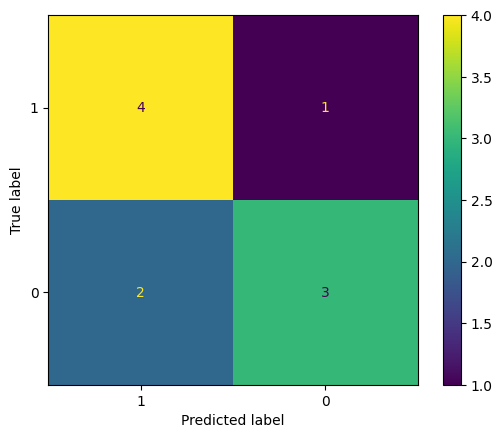

In [38]:
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=[1,0])
disp.plot()
plt.show()

## Precision and recall metrix

### Overview

In pattern recognition, information retrieval and classification (machine learning).

**Precision** (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, 

**Recall** (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved.



<img src="./images/Precision_Recall_part1.png" style="height:500px; display:inline-block; vertical-align:middle">
<img src="./images/Precision_Recall_part2.png" style="height:300px;  display:inline-block; margin-left:1em; vertical-align:middle">

Reference: [Precision_and_recall @wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

### Calculation

*Precision* = TP / (TP + FP)

*Recall*    = TP / (TP + FN)

In [43]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 1, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1]
# TP = 2, FP=3, TN = 0, FN = 1 


cnf_matrix = confusion_matrix(y_true, y_pred)
print('confusion matrix:\n', cnf_matrix)
print('~' * 50)

# to get the TP... and so on, values, we need to flatten the matrix with np.ravel() method:
tn, fp, fn, tp = cnf_matrix.ravel()

print(f'tn : {tn}')
print(f'fp : {fp}')
print(f'fn : {fn}')
print(f'tp : {tp}')

confusion matrix:
 [[0 3]
 [1 2]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tn : 0
fp : 3
fn : 1
tp : 2


In [44]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
acc_score = metrics.accuracy_score(y_true, y_pred); 

print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'acc_score: {acc_score}')

precision: 0.4
recall: 0.6666666666666666
acc_score: 0.3333333333333333


In [45]:
# or using the scikit methods:

print(f'precision: {metrics.precision_score(y_true, y_pred)}')
print(f'recall: {metrics.recall_score(y_true, y_pred)}')

precision: 0.4
recall: 0.6666666666666666


## Demo on different estimators

## Prepare the data

Let's generate a random n-class classification problem dataset, using scikit  function: [make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

The dataset will have 1,000 observations, with 10 input features, five of which will be informative and the remaining five will be redundant.

In [46]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, n_features=10, 
    n_informative=5, n_redundant=5, 
    n_classes=2, weights=[0.2, 0.8],
    random_state=42)

print(X.shape, y.shape)

print(f'y unique values: {np.unique(y, return_counts=True)}')

(1000, 10) (1000,)
y unique values: (array([0, 1]), array([202, 798]))


In [47]:
# let's bring some semanthics into classes:
class_names = ['terorist', 'non-terorist']

## Separate the training data from the test data

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

# X_train = X_test = df[['x1','x2']]
# y_train=y_test = df.y

X_train shape: (800, 10)
X_test shape: (200, 10)


## Choose and Train the model

We will use 2 classifiers, in order to compare the CM:

- a Dummy one, which always will predict one class only
- a CVM classifier

In [54]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

In [61]:
dummy = DummyClassifier(strategy="most_frequent")
svc = SVC(kernel="linear", C=12)
lr = LogisticRegression(random_state=0)

In [56]:
dummy_y_pred = dummy.fit(X_train, y_train).predict(X_test)
svc_y_pred = svc.fit(X_train, y_train).predict(X_test)
lr_y_pred = lr.fit(X_train, y_train).predict(X_test)

In [57]:
max(y_test.mean(), 1 - y_test.mean())

0.79

## Evaluating the Model

### Classifier Accuracy Score

In [58]:
# Model Accuracy: 
print("Dummy Accuracy:",metrics.accuracy_score(y_test, dummy_y_pred))
print("SVC Accuracy:",metrics.accuracy_score(y_test, svc_y_pred))
print("LR Accuracy:",metrics.accuracy_score(y_test, lr_y_pred))

Dummy Accuracy: 0.79
SVC Accuracy: 0.885
LR Accuracy: 0.895


In [59]:
# Model Precision:
print("Dummy Precision:",metrics.precision_score(y_test, dummy_y_pred))
print("SVC Precision:",metrics.precision_score(y_test, svc_y_pred))
print("LR Precision:",metrics.precision_score(y_test, lr_y_pred))

Dummy Precision: 0.79
SVC Precision: 0.8994082840236687
LR Precision: 0.9101796407185628


In [60]:
# Model Recall: 
print("Dummy Recall:",metrics.recall_score(y_test, dummy_y_pred))
print("SVC Recall:",metrics.recall_score(y_test, svc_y_pred))
print("LR Recall:",metrics.recall_score(y_test, svc_y_pred))

Dummy Recall: 1.0
SVC Recall: 0.9620253164556962
LR Recall: 0.9620253164556962


In [ ]:
print(metrics.confusion_matrix(y_test, svc_y_pred))

[[ 25  17]
 [  6 152]]
